
## EXERCICE 4 : Utilisation de Pandas et sklearn pour l'analyse de donnees reeles



In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


### Question 1 : 
- utiliser la fonction pandas.read_csv avec les bonnes options pour charger le fichier RealMedicalData.csv. On remarquera que le separateur dans le fichier csv est ';' et que les decimales sont representees par des virgules et non des points. Il est important de remarquer qu'un dataframe et non un numpy array sera retourne. Cette classe contient l'equivalent d'un numpy.array mais aussi le nom des lignes et colonnes, tout comme dans les dataframes de R
- Extraire deux numpy.arrays X et y des donnes pour faire par la suite de la regression. Nous allons essayer d'expliquer  'Disease progression' avec les autres variables. Ce sera alors la colonne qui contient y. Les autres colonnes contiendront les donnees de X.
- Une fois X et y extrait, centrer et reduire X. La fonction sklearn.preprocessing.scale pourra etre utilisee


In [4]:
#1.1) get data out of the csv file
dataframe=pandas.read_csv("./RealMedicalData.csv",sep=';',decimal=b',')

listColNames=list(dataframe.columns)



#1.2) extract X and Y as numpy arrays

XY=dataframe.values
ColNb_Y=listColNames.index('Disease progression')


Y=XY[:,ColNb_Y].reshape((XY.shape[0],1))   #reshape is to make sure that Y is a column vector
X = np.delete(XY, ColNb_Y, 1)

X_scaled = preprocessing.scale(X)

listColNames.pop(ColNb_Y)     #to make it contains the column names of X only


'Disease progression'


### Question 2 : 
- Mettre en lien X et y a l'aide de la regression lineaire multiple avec une penalisation Lasso
- A la vue des resultats, quelle variable vous semble liee a 'Disease progression'?
- Verifier cette relation en representant des nuages de points mettant en lien les observations de chaque variable avec les observations de 'Disease progression'



Beta values
-> Acid 1 density: 1.2429854709648707
-> Acid 2 density: 0.0
-> Acid 3 density: 0.0
-> Cells 1 density: 0.0
-> Cells 2 density: 0.0
-> Pressure 1: -0.0
-> Pressure 2: 0.0
-> Bio-marker 1: -0.0
-> Bio-marker 2: 0.0
-> Biomarker 3: 0.0
-> Biomarker 4: 0.0
-> Biomarker 5: 0.0
-> Biomarker 6: 0.002632174567173513
-> Biomarker 6.1: -0.0
-> Biomarker 7: 0.0
-> Biomarker 8: -0.0
-> Biomarker 9: -0.07793400577030518
-> Biomarker 10: 0.0


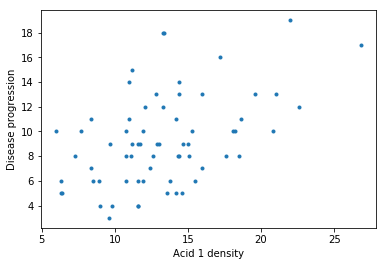

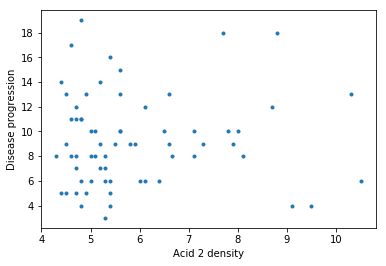

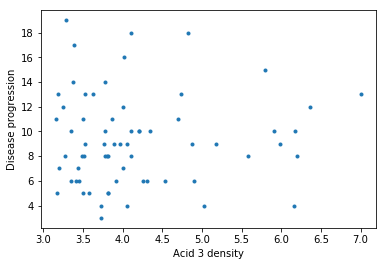

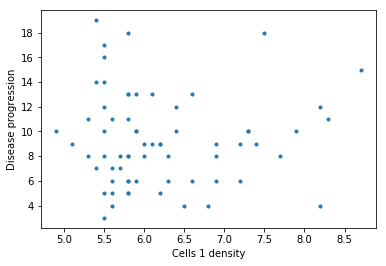

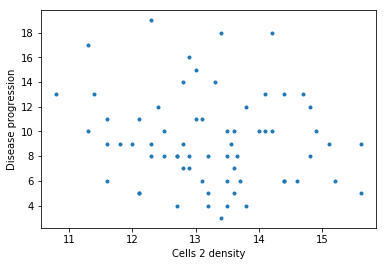

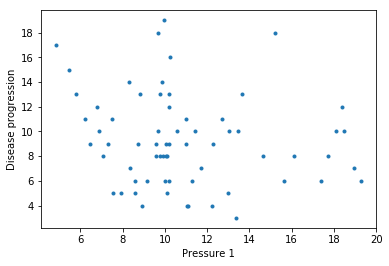

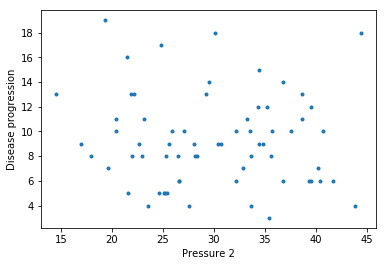

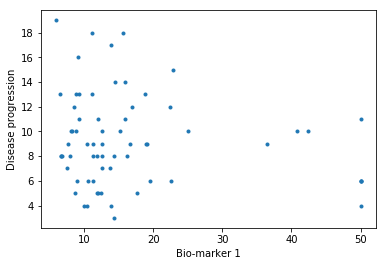

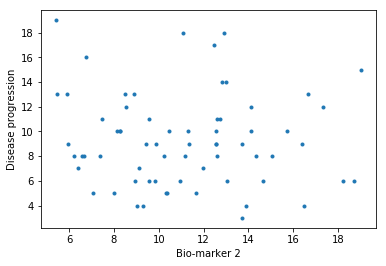

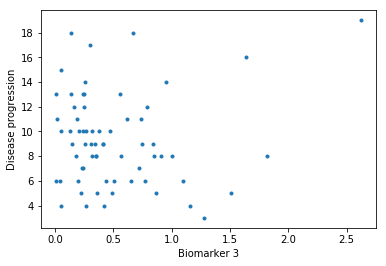

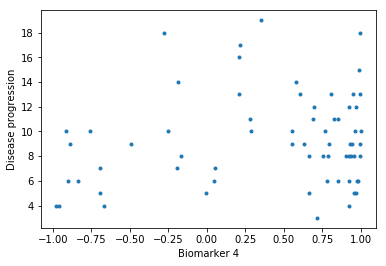

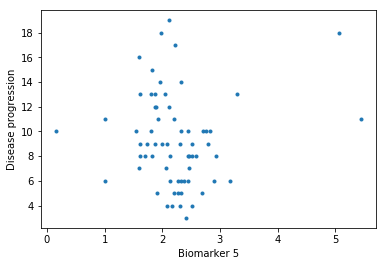

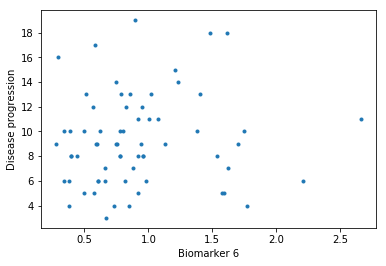

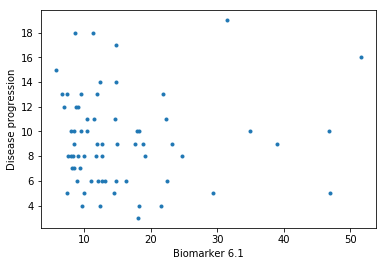

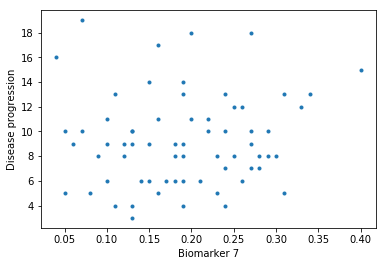

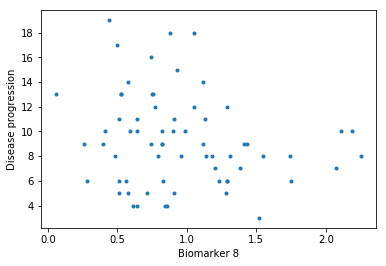

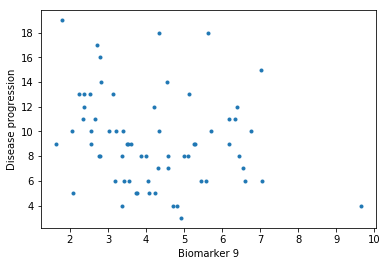

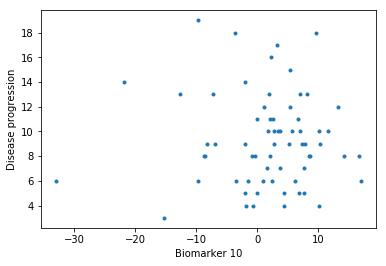

In [5]:
from sklearn.linear_model import Lasso

lasso_regressor=Lasso(alpha=0.5, fit_intercept=True)

lasso_regressor.fit(X_scaled,Y)

print('Beta values')
for Col in range(len(listColNames)):
  print('-> '+listColNames[Col]+': '+str(lasso_regressor.coef_[Col]))






for Col in range(len(listColNames)):
  plt.plot(X[:,Col],Y[:],'.')
  plt.xlabel(listColNames[Col])
  plt.ylabel('Disease progression')
  plt.show()

